In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [11]:
df = pd.read_csv('bank_full.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [91]:
# Exclui as colunas relacionas a campanha de marketing 
df = df.drop(['Unnamed: 0', 'contact', 'day', 'month', 'duration',
              'campaign', 'pdays', 'previous', 'poutcome'], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,deposit
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,yes
45207,71,retired,divorced,primary,no,1729,no,no,yes
45208,72,retired,married,secondary,no,5715,no,no,yes
45209,57,blue-collar,married,secondary,no,668,no,no,no


# Data Visualization

In [13]:
bins = [16, 25, 40, 50, 100]
labels = ['Jovem', 'Adulto', 'Adulto-Médio', 'Senior']
df['age_cat'] = pd.cut(df.age, bins, labels=labels)

Text(0.5, 1.0, 'Estado Civil dos potenciais Clientes')

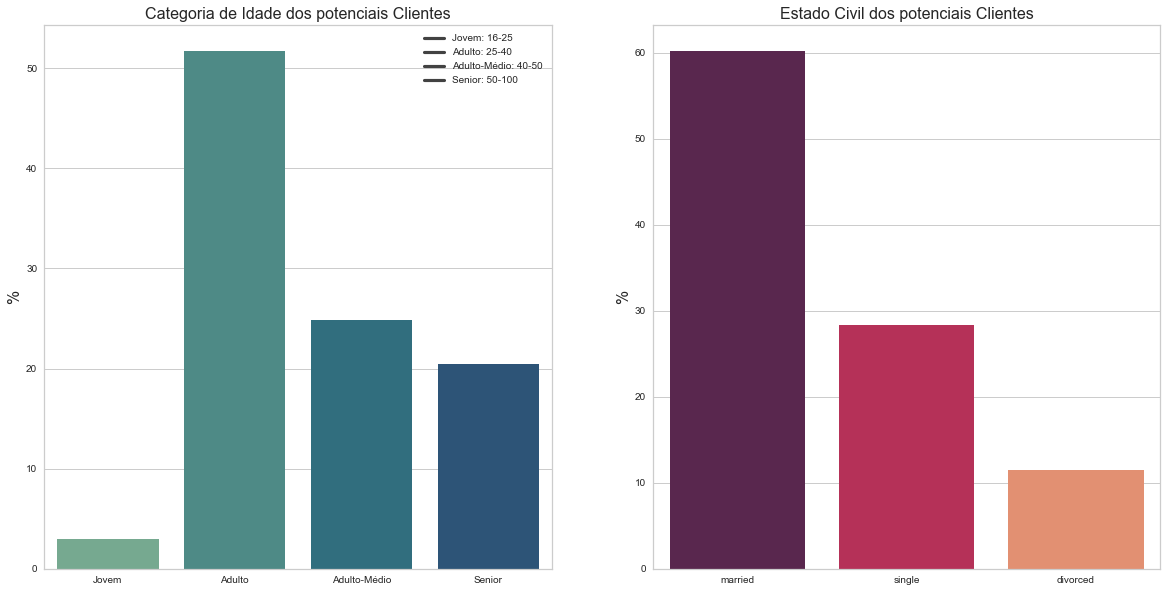

In [14]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=df.age_cat.value_counts().index, y=df.age_cat.value_counts(normalize=True).values * 100, data=df, palette='crest')
plt.ylabel('%', fontsize=16)
plt.title('Categoria de Idade dos potenciais Clientes', fontsize=16)
plt.legend(['Jovem: 16-25', 'Adulto: 25-40', 'Adulto-Médio: 40-50', 'Senior: 50-100'], loc='best')

plt.subplot(1, 2, 2)
sns.barplot(x=df.marital.unique(), y=df.marital.value_counts(normalize=True) * 100, data=df, palette='rocket')
plt.ylabel('%', fontsize=16)
plt.title('Estado Civil dos potenciais Clientes', fontsize=16)

Text(0.5, 1.0, 'Porcentagem de pessoas que abriram uma conta por nivel de educação')

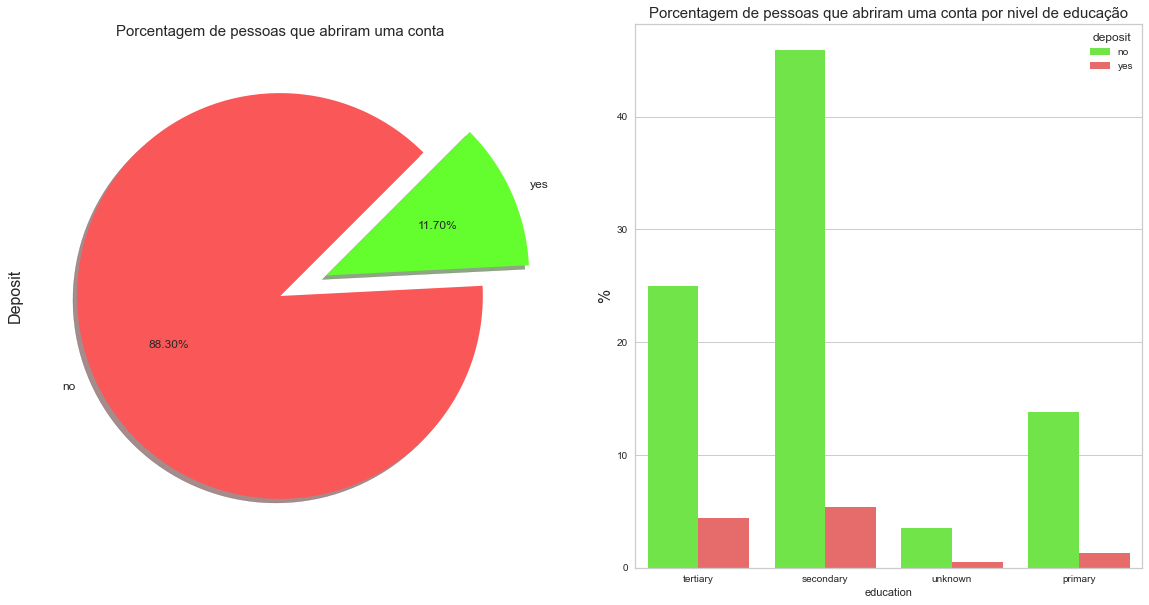

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

df['deposit'].value_counts().plot(autopct='%1.2f%%', ax=ax1, colors=["#FA5858", "#64FE2E"], 
                                  explode=[0,0.25],fontsize=12, kind='pie', shadow=True, startangle=45)

ax1.set_ylabel('Deposit', fontsize=16)
ax1.set_title('Porcentagem de pessoas que abriram uma conta', fontsize=15)


sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=["#64FE2E", "#FA5858"],
            estimator=lambda x: len(x) / len(df) * 100, ax=ax2)

ax2.set_ylabel('%', fontsize=16)
ax2.set_title('Porcentagem de pessoas que abriram uma conta por nivel de educação', fontsize=15)

Text(0.5, 1.0, 'Clientes que abriram conta por ocupação e balanço financeiro')

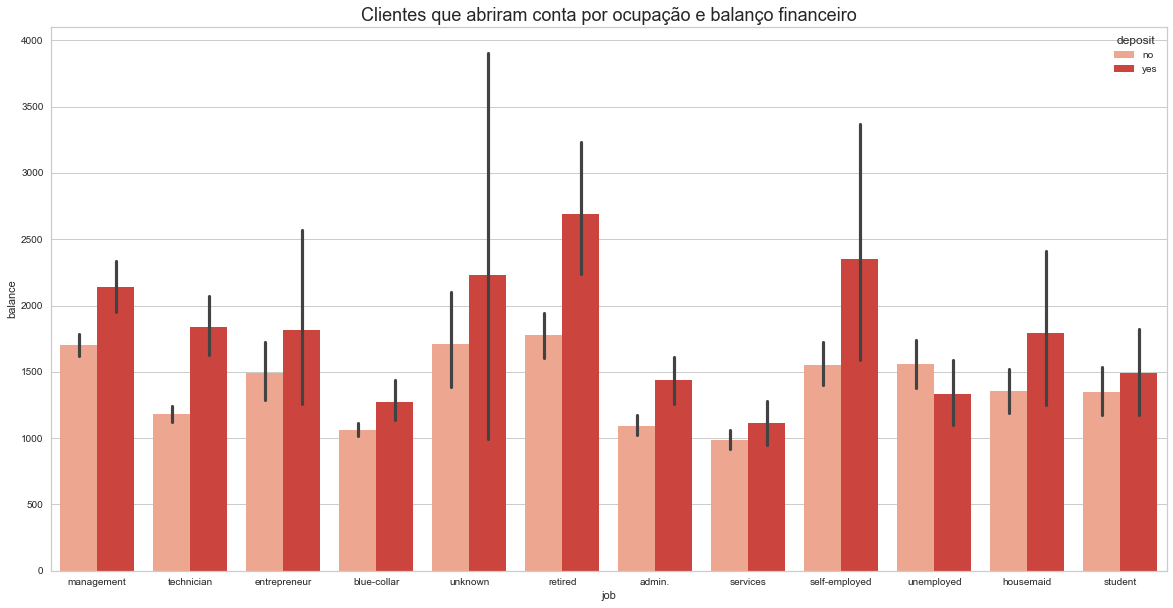

In [17]:
fig = plt.figure(figsize=(20, 10))

sns.barplot(x=df.job, y=df.balance, hue=df.deposit, palette='Reds')

plt.title('Clientes que abriram conta por ocupação e balanço financeiro', fontsize=18)

# Pre-Processing DataSet

In [92]:
object_cols = df.select_dtypes(include='object')
columns = ['age', 'balance']

class PreProcessing:
    
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    # Instanciando os transformadores  
    def instance(self):
        self.label_encoder = LabelEncoder()
        self.one_hot_encoder = OneHotEncoder(sparse=False)
        self.sc = StandardScaler()
    
    # Codificando as variaveis categóricas do DataSet
    def encoder(self, dataframe):
        self.dataframe = dataframe
        for x in object_cols:
            dataframe[x] = self.label_encoder.fit_transform(self.dataframe[x])
    
    # Transformando as variaveis categóricas em matriz esparsas 
    def hot_encoder(self):
        for x in object_cols:
            self.dataframe[x] = self.one_hot_encoder.fit_transform(self.dataframe[x].values.reshape(-1, 1))
    
    # Padronizando as colunas age e balance 
    def standard_scaler(self):
        for x in columns:
            self.dataframe[x] = self.sc.fit_transform(self.dataframe[x].values.reshape(-1, 1))

pp = PreProcessing(df)
pp.instance()
pp.encoder(df)
pp.hot_encoder()
pp.standard_scaler()

# Split Data

In [94]:
# Dividindo o DataSet em conjunto de treinamento e teste 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['deposit'], axis=1),
                                                    df['deposit'],
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and Test Models

In [95]:
class Instance:
    
    # Instanciando os objetos que serão utilizados 
    def models(self):
        self.gnb = GaussianNB()
        self.decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 42)
        self.random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 4)
        self.knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
        self.svm = SVC(kernel='rbf', random_state=42, C = 2.0)
    
    # Método de treinamento dos modelos        
    def fit(self):
        self.gnb.fit(X_train, y_train)
        self.decision_tree.fit(X_train, y_train)
        self.random_forest.fit(X_train, y_train)
        self.knn.fit(X_train, y_train)
        self.svm.fit(X_train, y_train)
     
    # Método de teste dos modelos  
    def predict(self):
        self.y_pred_gnb = self.gnb.predict(X_test)
        self.y_pred_decision_tree = self.decision_tree.predict(X_test)
        self.y_pred_random_forest = self.random_forest.predict(X_test)
        self.y_pred_knn = self.knn.predict(X_test)
        self.y_pred_svm = self.svm.predict(X_test)
        
    # Medindo a acurácia dos Modelos 
    def accuracy(self):
        print('Accuracy Naive Bayes:',accuracy_score(y_test, self.y_pred_gnb) * 100)
        print('Accuracy Decision Tree:',accuracy_score(y_test, self.y_pred_decision_tree) * 100)
        print('Accuracy Random Forest:',accuracy_score(y_test, self.y_pred_random_forest) * 100)
        print('Accuracy KNN:',accuracy_score(y_test, self.y_pred_knn) * 100)
        print('Accuracy SVM:',accuracy_score(y_test, self.y_pred_svm) * 100)
    
    # Aplicando validação cruzada para obter melhores parametros 
    def validation(self):
        self.grid_random_forest = GridSearchCV(self.random_forest, param_grid={'n_estimators':[5, 10, 20, 30, 40]}, cv=5)
        self.grid_knn = GridSearchCV(self.knn, param_grid={'n_neighbors': [5, 10, 15, 20, 25]}, cv=5)
    
    # Treinando os modelos com a validação cruzada 
    def train(self):
        self.grid_random_forest.fit(X_train, y_train)
        self.grid_knn.fit(X_train, y_train)
    
    # Obtendo os melhores paramêtros e suas respectivas pontuações 
    def scores(self):
        print('-=-='*30)
        print('Random Forest Best Estimator:', self.grid_random_forest.best_estimator_)
        print('Random Forest Best Params:', self.grid_random_forest.best_params_)
        print('Random Forest Best Score', self.grid_random_forest.best_score_ * 100)
        print('-=-=' * 30)
        print('KNN Best Estimator', self.grid_knn.best_estimator_)
        print('KNN Best Params', self.grid_knn.best_params_)
        print('KNN Best Score', self.grid_knn.best_score_ * 100)
        
instance = Instance()
instance.models()
instance.fit()
instance.predict()
instance.accuracy()
instance.validation()
instance.train()
instance.scores()

Accuracy Naive Bayes: 86.23244498507133
Accuracy Decision Tree: 83.00342806590734
Accuracy Random Forest: 85.27037487559438
Accuracy KNN: 86.69689262412916
Accuracy SVM: 87.93541966161672
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Random Forest Best Estimator: RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=4)
Random Forest Best Params: {'n_estimators': 40}
Random Forest Best Score 85.5507551651435
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
KNN Best Estimator KNeighborsClassifier(n_neighbors=25)
KNN Best Params {'n_neighbors': 25}
KNN Best Score 88.26034149612482
